# 1. Perkenalan

#### 1.1 Gambaran Data

Data didapatkan dan dikumpulkan dari Kickstarter Platform dan dapat digunakan untuk analisis proyek. 

seluruh column memiliki deskripsi sama seperti artinya, kecuali:

* usd_pledged: konversi dalam dolar AS dari the pledged column (konversi dilakukan oleh kickstarter).
* usd_pledge_real: konversi dalam dolar AS dari the pledged column (konversi dari Fixer.io API).
* usd_goal_real: konversi dalam dolar AS dari the goal column (konversi dari Fixer.io API).

#### 1.2 Sumber Data

Dataset asli berasal dari kaggle dengan link: https://www.kaggle.com/kemical/kickstarter-projects?select=ks-projects-201801.csv

#### 1.3 Objective

Melakukan analisa terhadap dataset apakah ada hubungan antara Jumlah yang dijanjikan dalam mata uang proyek (variabel usd pledged) dengan statement yang berkaitan dengan keberhasilan peluncuran produk (variabel state)

# 2. Import Pustaka

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import chi2
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 3. Data Loading

#### 3.1 Loading dataset

In [2]:
data = pd.read_csv('ks-projects-201801.csv')

#### 3.2  Melihat 5 data teratas

In [3]:
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


#### 3.3 Melihat jumlah rows dan columns dataset

In [4]:
data.shape

(378661, 15)

#### 3.4 Melihat informasi yang terdapat didalam dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


#### 3.5 Melihat columns dataset

In [6]:
data.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

#### 3.6 melihat missing data dari dataset

In [7]:
data.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

#### 3.7 Melihat statistic dari dataset

In [8]:
data.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


# 4. Data Cleaning

#### 4.1 Melihat Persentase  Missing Values

In [9]:
# melihat persentase missing data
data.isnull().mean()

ID                  0.000000
name                0.000011
category            0.000000
main_category       0.000000
currency            0.000000
deadline            0.000000
goal                0.000000
launched            0.000000
pledged             0.000000
state               0.000000
backers             0.000000
country             0.000000
usd pledged         0.010027
usd_pledged_real    0.000000
usd_goal_real       0.000000
dtype: float64

In [10]:
print("Persentase Missing Value name: \n ", 0.000011*100)
print("Persentase Missing Value usd pledged : \n ", 0.010027*100)

Persentase Missing Value name: 
  0.0011
Persentase Missing Value usd pledged : 
  1.0027


#### 4.2 melihat apakah Missing Values termasuk Standar Missing Values atau Non-Standar Missing Values


In [11]:
data['name'].unique()

array(['The Songs of Adelaide & Abullah',
       'Greeting From Earth: ZGAC Arts Capsule For ET', 'Where is Hank?',
       ...,
       'Walls of Remedy- New lesbian Romantic Comedy feature unlike any other!!',
       'BioDefense Education Kit', 'Nou Renmen Ayiti!  We Love Haiti!'],
      dtype=object)

In [12]:
data['usd pledged'].unique()

array([   0.  ,  100.  ,  220.  , ..., 1732.02, 5019.92, 2698.97])

#### 4.3 Mengisi Missing Values 

In [13]:
data['name'].value_counts()

New EP/Music Development                             41
Canceled (Canceled)                                  13
Music Video                                          11
N/A (Canceled)                                       11
New EP / Music Development                           10
                                                     ..
Traveling Broke and Out of Gas - Third Album!!        1
www.wesaveourearth.com / www.donations-app.com        1
The Knitting Chicken                                  1
Light in the Dark NEPA Photography Book               1
Covoiturage Inter-Urbain / Inter-urban Carpooling     1
Name: name, Length: 375764, dtype: int64

In [14]:
# mengisi missing values 'name' dengan 'New EP/Music Development'
data['name'].fillna('New EP/Music Development', inplace=True)

missing data dalam variabel data['name'] diisi dengan value yang paling banyak yaitu 'New EP/Music Development'

In [15]:
# nilai median dari data['usd pledged']
data['usd pledged'].quantile([0.50][0])

394.72

In [16]:
# mengisi missing values 'usd pledged'
data['usd pledged'].fillna(394.72, inplace=True)

missing data dalam variabel data['usd pledged'] diisi dengan median value yaitu 394.72

In [17]:
# melihat jumlah missing data dalam dataset setelah mengisi missing values
data.isna().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

#### 4.4 Rename Columns

melakukan rename kolom "state" menjadi "statement"

In [18]:
data = data.rename(
  columns={'state': "launch_status"}
)

#### 4.5 Membuat columns baru

variabel pledged_goal adalah variabel usd_pledged_real dikurangi dengan variabel usd_goal_real, yang fungsinya untuk melihat selisih antara nilai yang direncanakan (usd_goal_real) dengan nilai yang dijaminkan (usd_pledged_real)

In [19]:
data["pledged_goal"] = data["usd_pledged_real"] - data["usd_goal_real"]

#### 4.6 Merubah format datatime

Merubah format time dan membuat column baru yaitu column 'month_deadline' dan 'year_deadline'

In [20]:
data['deadline'] = pd.to_datetime(data['deadline'])
data['month_deadline'] = data['deadline'].dt.month
data['year_deadline'] = data['deadline'].dt.year

# 5. Explorasi Data

In [21]:
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,launch_status,backers,country,usd pledged,usd_pledged_real,usd_goal_real,pledged_goal,month_deadline,year_deadline
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,-1533.95,10,2015
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,-27579.00,11,2017
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,-44780.00,2,2013
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,-4999.00,4,2012
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,-18217.00,8,2015


#### 5.1 Query

Dalam melakukan Explorasi data ini akan melihat variabel statement dan membuat query baru berdasarkan variabel statement yaitu 'failed', 'canceled', 'successful', 'live', 'undefined', 'suspended'

In [22]:
data.launch_status.unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

In [23]:
# membuat query failed
failed = data[data.launch_status == 'failed']

In [24]:
# membuat query canceled
canceled = data[data.launch_status == 'canceled']

In [25]:
# membuat query successfull
successful = data[data.launch_status == 'successful']

In [26]:
# membuat query live
live = data[data.launch_status == 'live']

In [27]:
# membuat query undefined
undefined = data[data.launch_status == 'undefined']

In [28]:
# membuat query suspended
suspended = data[data.launch_status == 'suspended']

#### Menghitung nilai rata-rata (Mean) dari pledged_goal 

In [29]:
failed_mean = failed["pledged_goal"].mean()
print("nilai failed mean: \n", failed_mean)

nilai failed mean: 
 -61854.13840526062


In [30]:
canceled_mean = canceled["pledged_goal"].mean()
print("nilai canceled mean: \n", canceled_mean)

nilai canceled mean: 
 -73238.89371489763


In [31]:
successful_mean = successful["pledged_goal"].mean()
print("nilai successful mean: \n", successful_mean)

nilai successful mean: 
 13137.94187397351


In [32]:
live_mean = live["pledged_goal"].mean()
print("nilai live mean: \n", live_mean)

nilai live mean: 
 -56666.114062165085


In [33]:
undefined_mean = undefined["pledged_goal"].mean()
print("nilai undefined mean: \n", undefined_mean)

nilai undefined mean: 
 -1890.1668023582263


In [34]:
suspended_mean = suspended["pledged_goal"].mean()
print("nilai suspended mean: \n", suspended_mean)

nilai suspended mean: 
 -165895.62731310935


In [35]:
# make plot 
pledged_goal_analisis = {"failed": failed_mean,
                         "canceled": canceled_mean,
                         "live": live_mean,
                         "undefined": undefined_mean,
                         "suspended": suspended_mean,
                         "successful": successful_mean
                        }

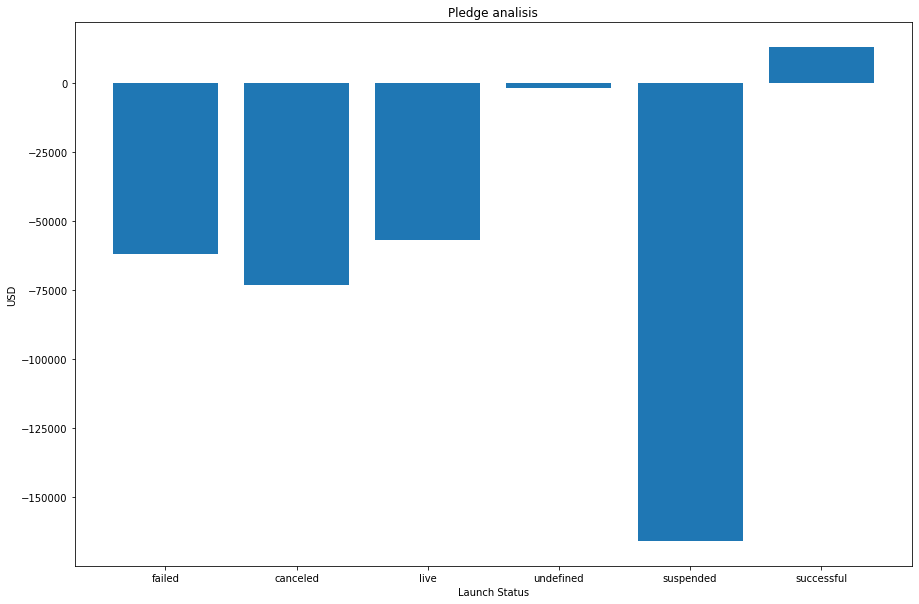

In [36]:
# setup plot
fig, ax = plt.subplots(figsize=(15,10))

# plot data
ax.bar(pledged_goal_analisis.keys(), pledged_goal_analisis.values());

# customize plot
ax.set(title="Pledge analisis",
       xlabel="Launch Status",
       ylabel="USD"
      );

Dari hasil Plotting terlihat bahwa ada kemungkinan nilai variabel usd_pledged_real sangat berpengaruh terdapat status peluncuran atau variabel launch dari suatu produk, oleh karena itu kita akan melakukan Hypothesis testing untuk melihat **apakah adanya atau tidaknya hubungan yang signifikan antara variabel launch dan usd_pledged_real.**

# 6. Measure of Central Tendency

In [37]:
# membuat variabel pledged_real
pledged_real = data.usd_pledged_real

#### Mean pledged_real

In [38]:
mean = pledged_real.mean()
print("Mean pledged real: \n", mean)

Mean pledged real: 
 9058.924074119337


#### Median pledged_real

In [39]:
median = pledged_real.median()
print("Median pledged real: \n", median)

Median pledged real: 
 624.33


#### Modus pledged_real

In [40]:
modus = pledged_real.mode()[0]
print("Modus pledge real: \n", modus)

Modus pledge real: 
 0.0


# 7. Measure Of Variance

#### Range pledged_real

In [41]:
range = pledged_real.max() - pledged_real.min()
print("Range pledged_real: \n", range)

Range pledged_real: 
 20338986.27


#### Variance pledged_real

In [42]:
variance = pledged_real.var()
print("Variance pledged_real: \n", variance)

Variance pledged_real: 
 8276149156.121636


#### Standar Deviasi pledged_real

In [43]:
standar = pledged_real.std()
print("Standar Deviasi pledged_real: \n", standar)

Standar Deviasi pledged_real: 
 90973.34310731708


#### Confidence Interval pledged_real

Confidence Interval ditetapkan sebesar 95% dengan Critical Value 5%

In [44]:
ci = stats.norm.interval(0.95, mean, standar)
print("Confidence Interval pledged_real: \n", ci)

Confidence Interval pledged_real: 
 (-169245.55196942732, 187363.400117666)


# 8. Hypothesis Testing

Dalam melakukan Hypothesis Testing, menggunakan metode Chi-Square Test karena variabel yang akan dilakukan pengujian adalah variabel kategorikal yaitu variabel launch

Dalam analisa hypothesis testing kita ingin menguji **apakah adanya atau tidaknya hubungan yang signifikan antara variabel launch dan usd_pledged_real**, sehingga kita dapat menyatakan Hypothesis sebagai berikut:

* Hypothesis Null(H0) adalah adanya kemungkinan hubungan yang signifikan antara variabel launch dan usd_pledged_real,
* Hypothesis alternatif(H1) adalah tidaknya kemungkinan hubungan yang signifikan antara variabel launch dan usd_pledged_real

Kriteria Pengujian Hypothesis adalah:

* H0 diterima, apabila uji statistik berada diluar nilai kritis;
* H0 ditolak, apabila uji statistik berada di dalam nilai kritis

dalam analisa ini kita juga menetapkan Confidence Interval sebesar 95% dengan Critical Value sebesar 5%

In [45]:
# membuat variabel dataset_tabel
dataset_table = pd.crosstab(data['launch_status'],data['usd_pledged_real'])

# membuat observed_values
observed_values = dataset_table.values
print("Observed Values: \n", observed_values)
print("\n")

# membuat fungsi menghitung statistik chi-kuadrat dan nilai-p untuk uji hipotesis independensi frekuensi yang diamati 
val = stats.chi2_contingency(dataset_table)

# menentukan expected values
expected_values = val[3]
print("Expected Values: \n", expected_values)
print("\n")

# menentukan panjang coloumns dan rows
no_of_rows=len(dataset_table.iloc[0:,0]) #(rows,)
no_of_columns=len(dataset_table.iloc[0, 0:]) #(,columns)

# mencari degree of freedom
ddof = (no_of_rows - 1)*(no_of_columns-1)
print("Degree of Freedom: \n", ddof)
print("\n")

# chi_square testing
chi_square=sum([(o-e)**2./e for o,e in zip(observed_values,expected_values)])

# menjumlahkan nilai chi_quare_statistic
chi_square_statistic = chi_square[0]+chi_square[1]
print('Chi-square: \n', chi_square)
print("\n")
print('Chi-square statistic: \n', chi_square_statistic)
print("\n")

# p-value
p_value= 1-chi2.cdf(x=chi_square_statistic, df=ddof)
print('P Value: \n', p_value)
print("\n")

# Confidence Interval
confidence_interval = 0.95
print('Confidence Interval: \n', confidence_interval)
print("\n")

# alpha
alpha = 0.05
print('Nilai kritis (alpha): \n', alpha)
print("\n")

# Menentukan hasil Hypothesis Testing
print("Hasil Hypothesis Testing: \n")
if p_value < alpha :
    print("Hypothesis (H0) ditolak, tidak adanya kemungkinan hubungan yang signifikan antara variabel launch dan usd_pledged_real")
else:
    print("Hypothesis (H0) diterima, adanya kemungkinan hubungan yang signifikan antara variabel launch dan usd_pledged_real")

Observed Values: 
 [[12025     0     0 ...     0     0     0]
 [38656     1     1 ...     0     0     0]
 [  549     0     0 ...     0     0     0]
 [    0     0     0 ...     1     1     1]
 [  614     0     0 ...     0     0     0]
 [  683     0     0 ...     0     0     0]]


Expected Values: 
 [[5.37933543e+03 1.02410864e-01 1.02410864e-01 ... 1.02410864e-01
  1.02410864e-01 1.02410864e-01]
 [2.74271338e+04 5.22153060e-01 5.22153060e-01 ... 5.22153060e-01
  5.22153060e-01 5.22153060e-01]
 [3.88270968e+02 7.39183597e-03 7.39183597e-03 ... 7.39183597e-03
  7.39183597e-03 7.39183597e-03]
 [1.85820742e+04 3.53762336e-01 3.53762336e-01 ... 3.53762336e-01
  3.53762336e-01 3.53762336e-01]
 [2.56072957e+02 4.87507295e-03 4.87507295e-03 ... 4.87507295e-03
  4.87507295e-03 4.87507295e-03]
 [4.94112607e+02 9.40683091e-03 9.40683091e-03 ... 9.40683091e-03
  9.40683091e-03 9.40683091e-03]]


Degree of Freedom: 
 530320


Chi-square: 
 [3.20283851e+04 9.15147254e-01 9.15147254e-01 ... 1.82675655

# 9. Pengambilan Kesimpulan

Dasar dari penetapan Hypothesis dalam Hypothesis testing adalah dengan melakukan plotting bar pledged_goal yang dihasilkan dari "usd_pledged_real" dikurangi "usd_goal_real" terhadap status launch dari produk, dari hasil Plotting terlihat bahwa ada kemungkinan nilai variabel usd_pledged_real sangat berpengaruh terdapat status peluncuran atau variabel launch dari suatu produk, oleh karena itu kita akan melakukan Hypothesis testing untuk melihat **apakah adanya atau tidaknya hubungan yang signifikan antara variabel launch dan usd_pledged_real**


Dari hasil Hypothesis Testing untuk menganalisa apakah adanya atau tidaknya hubungan yang signifikan antara variabel launch dan usd_pledged_real, sehingga kita dapat menyatakan Hypothesis sebagai berikut:

* Hypothesis Null(H0) adalah adanya kemungkinan hubungan yang signifikan antara variabel launch dan usd_pledged_real,
* Hypothesis alternatif(H1) adalah tidaknya kemungkinan hubungan yang signifikan antara variabel launch dan usd_pledged_real

Kriteria Pengujian Hypothesis adalah:

* H0 diterima, apabila uji statistik berada diluar nilai kritis;
* H0 ditolak, apabila uji statistik berada di dalam nilai kritis

Dalam analisa ini kita juga menetapkan:
* Menggunakan metode Chi-Square Test karena variabel yang akan dilakukan pengujian adalah variabel kategorikal yaitu variabel launch    
* Confidence Interval sebesar 95% dengan Critical Value sebesar 5%

Dari Hasil Hypotesis Testing di peroleh hasil dan kesimpulan sebagai berikut:

* **Hypothesis (H0) diterima**, sehingga dapat disimpulkan **adanya kemungkinan hubungan yang signifikan antara variabel launch dan usd_pledged_real**
* Hypothesis (H0) diterima karena nilai uji statistik (p_value) sebesar 1 lebih besar dari nilai Critical Value sebesar 5%